<a href="https://colab.research.google.com/github/SampMark/Machine-Learn/blob/main/K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelagem K-Vizinhos Mais Próximos (K-Nearest Neighbors): aplicada a segmentação de clientes**

O algoritmo K-Vizinhos Mais Próximos (KNN) é uma abordagem de classificação amplamente utilizada em aprendizado de máquina supervisionado, é flexível e fácil de implementar, sendo adequado para uma ampla gama de tarefas de classificação e regressão. Ele funciona ao classificar novos dados com base na similaridade com pontos rotulados em um conjunto de dados de treinamento. A ideia central é que pontos de dados semelhantes (ou vizinhos próximos) compartilhem as mesmas classes.

Imagine um exemplo prático: uma empresa de telecomunicações categoriza seus clientes em quatro grupos com base em padrões de uso. Se informações demográficas como idade e renda puderem ser usadas para prever o grupo de um cliente, a empresa pode personalizar suas ofertas. O objetivo, nesse caso, seria construir um modelo de classificação usando os dados rotulados (categorias dos clientes) para prever a classe de novos clientes.

O KNN realiza essa tarefa analisando a proximidade entre pontos de dados em termos de características, como idade e renda. A "proximidade" é calculada utilizando métricas como a [distância Euclidiana](https://github.com/SampMark/Computational-Thinking/blob/main/Minkowski_Manhattan_and_Euclidean_distance_metrics.ipynb), que mede a diferença geométrica entre os pontos.

Embora simples em sua estrutura, o k-NN detém um poder expressivo para identificar padrões, tendo se tornado popularmente conhecido em diversas aplicações no campo da ciência da computação e áreas correlatas.

Podemos ilustrar aqui alguma aplicações do k-NN, entre elas:
1.	**Reconhecimento de padrões**: O k-NN pode ser usado para classificar imagens, reconhecimento facial, diagnósticos médicos, com base nas características extraídas. O K-NN é aplicado na análise de dados hospitalares (resultados e imagens de exames, etc.), sendo treinado no diagnóstico de doenças com base em características de pacientes e sintomas. Por exemplo, pode ser usado para classificar tumores como benignos ou malignos, utilizando dados de imagens médicas ou resultados de biópsias.

2.	**Sistemas de Recomendação**: Em sistemas de recomendação de filmes, música, produtos em e-commerce etc., o k-NN pode ser usado para recomendar itens com base na similaridade entre usuários ou produtos. Por exemplo, se vários usuários com preferências semelhantes gostarem de um produto, esse produto pode ser recomendado a um novo usuário com preferências similares. Em aplicações de *marketing*, por exemplo, o k-NN pode ser aplicado para segmentar consumidores em grupos com base em características demográficas e comportamentais, permitindo campanhas mais direcionadas e personalizadas.

3.	**Detecção de Anomalias**: O k-NN pode ser usado em "detecção de anomalias", isto é, *outliers* em conjuntos de dados, especialmente em sistemas de monitoramento e segurança. As anomalias são detectadas com base em sua distância aos vizinhos mais próximos. Se um ponto de dados está muito distante de todos os seus vizinhos, ele pode ser considerado uma anomalia. Por exemplo, pode ser aplicado na detecção de **fraudes bancárias**, identificando transações  anômalas em relação ao histórico do cliente, ou ainda, para  identificar tráfegos incomuns ou suspeitos em redes de computadores, como ataques cibernéticos.

O algoritmo KNN é simples, mas poderoso, oferecendo uma abordagem intuitiva para problemas de classificação e regressão. Apesar de ser sensível à escolha de
𝐾 e à normalização dos dados, é eficaz em cenários onde os pontos de dados semelhantes compartilham características comuns. Tem aplicações em diversas áreas como *marketing*, economia, entre outras.

## **Instalando e importando os pacotes Python**

In [2]:
!pip install scikit-learn
!pip install matplotlib
!pip install pandas
!pip install numpy
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


## **Utilização do k-NN para segmentação da base de clientes de empresa de telecomunicações (hipotética)**

Uma empresa de telecomunicações pretende oferecer planos de celular personalizados para seus clientes e novos em potencial, com base no perfil de segmentação de mercado. A estratégia de marketing  permitindo campanhas mais direcionadas e personalizadas.

Para tal a seguir foi desenvolvida a utilização e análise dos dados de modo a segmentar consumidores em grupos com base em características demográficas, faixa etária, renda e até mesmo comportamentais. Para isso, a empresa de telecomunicações analisou o comportamento dos clientes atuais e os dividiu em quatro grupos, cada um com  perfil de usuário, isto é, plano de consumo diferente, a seguir:

1. **Serviço Básico** (*Basic-service*): Clientes que usam pouco o celular, geralmente apenas para ligações e mensagens.
2. **E-Serviço** (*E-Service customers*): Clientes que usam bastante a internet, principalmente para redes sociais e e-mails.
3. **Serviço Plus** (*Plus Service*): Clientes que usam o celular de forma moderada, tanto para ligações e mensagens quanto para internet.
4. **Serviço Total** (*Total Service*): Clientes que usam o celular intensamente, com alto consumo de internet, ligações e mensagens.

A empresa dispõe dos dados necessários para classificação de caracteríticas comuns, como região onde o cliente mora, idade, estado civil, entre outras. As quais podem ajudar a prever qual grupo determinado tipo de cliente se encaixa. Com essas informações, a empresa pode criar ofertas personalizadas para atrair novos clientes.

Para realizar previsões, a empresa vai modelar utilizando o k-NN de modo a  analisar as características de um potencial novo cliente e, simultanemante,  "chutar" em qual dos quatro grupos ele pertenceria e assim ofertar o serviço.
Ou seja, comparando-se as características dos potenciais novos clientes com as características dos clientes atuais, o modelo encontrará os "vizinhos" mais parecidos com o novo cliente e, com base no grupo desses vizinhos, é possível prever a qual grupo pertencerá os clientes potenciais.

## **Extração, visualização e análise de dados**

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/SampMark/files/refs/heads/main/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [24]:
# Contagem absoluta e percentual de cada categoria
counts = df['custcat'].value_counts()
percentages = df['custcat'].value_counts(normalize=True) * 100

# Criar DataFrame formatado
table = pd.DataFrame({
    'Planos': counts.index,
    'Nº de Clientes': counts.values,
    '% de Clientes': percentages.values
})

# Ordenar por categoria de plano (opcional, se precisar em ordem específica)
table = table.sort_values(by='Planos').reset_index(drop=True)

# Exibir a tabela formatada
print("Tabela - Número e percentuais de clientes por categorias")
print(table)


Tabela - Número e percentuais de clientes por categorias
   Planos  Nº de Clientes  % de Clientes
0       1             266           26.6
1       2             217           21.7
2       3             281           28.1
3       4             236           23.6


Output: 1. Basic-service (266), 2. E-Service customers (217), 3. Plus Service (281), 4. Total Service (236)

<Figure size 800x600 with 0 Axes>

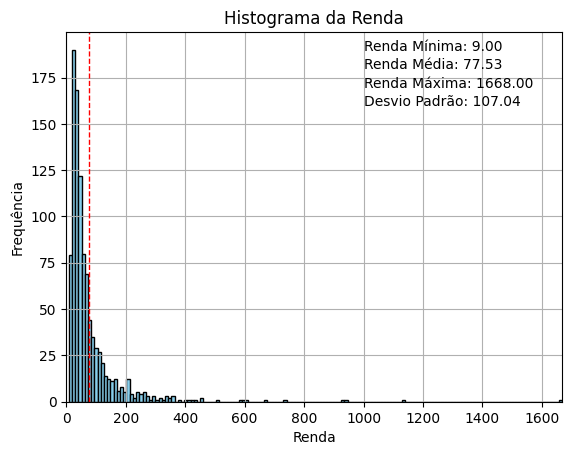

Renda mínima: 9.00
Renda média: 77.53
Renda máxima: 1668.00
Desvio padrão: 107.04


In [25]:
#Plotar histograma de distribuição de renda dos clientes
plt.figure(figsize=(8, 6))  # Ajustar o tamanho da figura
df.hist(column='income', bins='auto', color='skyblue', edgecolor='black')
plt.title('Histograma da Renda')
plt.xlabel('Renda')
plt.ylabel('Frequência')
plt.xlim(0, df['income'].max())
plt.grid(True)  # Adicionar grade ao gráfico

# Calcular mínimo, máximo, média e desvio padrão
minimo = df['income'].min()
maximo = df['income'].max()
media = df['income'].mean()
desvio_padrao = df['income'].std()

# Exibir média e desvio padrão no gráfico
plt.text(0.6, 0.95, f'Renda Mínima: {minimo:.2f}', transform=plt.gca().transAxes)
plt.text(0.6, 0.9, f'Renda Média: {media:.2f}', transform=plt.gca().transAxes)
plt.text(0.6, 0.85, f'Renda Máxima: {maximo:.2f}', transform=plt.gca().transAxes)
plt.text(0.6, 0.8, f'Desvio Padrão: {desvio_padrao:.2f}', transform=plt.gca().transAxes)

# Adicionar linha vertical para a média
plt.axvline(media, color='red', linestyle='dashed', linewidth=1)

plt.show()

# Imprimir os valores de mínimo, média, máximo e desvio padrão
print(f"Renda mínima: {minimo:.2f}")
print(f"Renda média: {media:.2f}")
print(f"Renda máxima: {maximo:.2f}")
print(f"Desvio padrão: {desvio_padrao:.2f}")

**Análise Explicativa do Histograma de Distribuição de Renda dos Clientes**

A distribuição da renda dos clientes concentra-se na faixa inicial (abaixo de $200) e a longa cauda à direita sugere  distribuição assimétrica, onde poucos clientes apresentam rendas muito superiores à média, ou seja, há um contraste significativo entre a maioria dos clientes e aqueles com rendas mais altas.

A média (77.53) e o desvio padrão (107.04) indicam dispersão relativamente ampla dos dados. Como o desvio padrão é maior do que a média, a presença de rendas muito elevadas que puxam a média para cima, mas as rendas elevadas representam um número pequeno de clientes.

Com um máximo de $1668, muito acima da média, evidencia-se os *outliers*, que aumentam a amplitude da distribuição.

<Figure size 800x600 with 0 Axes>

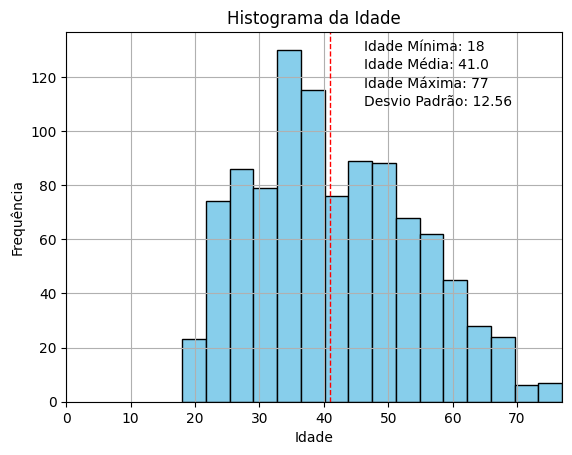

Idade mínima: 18.00
Idade média: 41.00
Idade máxima: 77.00
Desvio padrão: 12.56


In [26]:
# Plotar histograma de distribuição de idade dos clientes
plt.figure(figsize=(8, 6))  # Ajustar o tamanho da figura
df.hist(column='age', bins='auto', color='skyblue', edgecolor='black')
plt.title('Histograma da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.xlim(0, df['age'].max())
plt.grid(True)  # Adicionar grade ao gráfico

# Calcular mínimo, máximo, média e desvio padrão
minimo = int(df['age'].min())
maximo = int(df['age'].max())
media = int(df['age'].mean())
desvio_padrao = df['age'].std()

# Exibir média e desvio padrão no gráfico
plt.text(0.6, 0.95, f'Idade Mínima: {minimo}', transform=plt.gca().transAxes)
plt.text(0.6, 0.9, f'Idade Média: {media:.1f}', transform=plt.gca().transAxes)
plt.text(0.6, 0.85, f'Idade Máxima: {maximo}', transform=plt.gca().transAxes)
plt.text(0.6, 0.8, f'Desvio Padrão: {desvio_padrao:.2f}', transform=plt.gca().transAxes)

# Adicionar linha vertical para a média
plt.axvline(media, color='red', linestyle='dashed', linewidth=1)

plt.show()

# Imprimir os valores de mínimo, média, máximo e desvio padrão
print(f"Idade mínima: {minimo:.2f}")
print(f"Idade média: {media:.2f}")
print(f"Idade máxima: {maximo:.2f}")
print(f"Desvio padrão: {desvio_padrao:.2f}")

**Análise Explicativa do Histograma da Distribuição de Idade**

O histograma de distribuição de idade apresenta predominância de clientes na faixa etária de adultos jovens a meia-idade, dos 30 aos 50 anos, seguindo um padrão aproximadamente simétrico com  leve concentração em torno da média, o que pode refletir o perfil demográfico da base de clientes para um público predominantemente de "meia-idade" - poucas ocorrências em idades mais jovens e mais avançadas. Ou seja, clientela em plena atividade econômica com necessidade de utilização de smartphones.  .

A média de idade é 41 anos, enquanto o desvio padrão é 12.56, havendo dispersão moderada em torno da média. A idade mínima é 18 anos, indicando que a empresa atende clientes desde o início da idade adulta. A idade máxima é 77, portanto,há uma pequena parcela de clientes idosos.


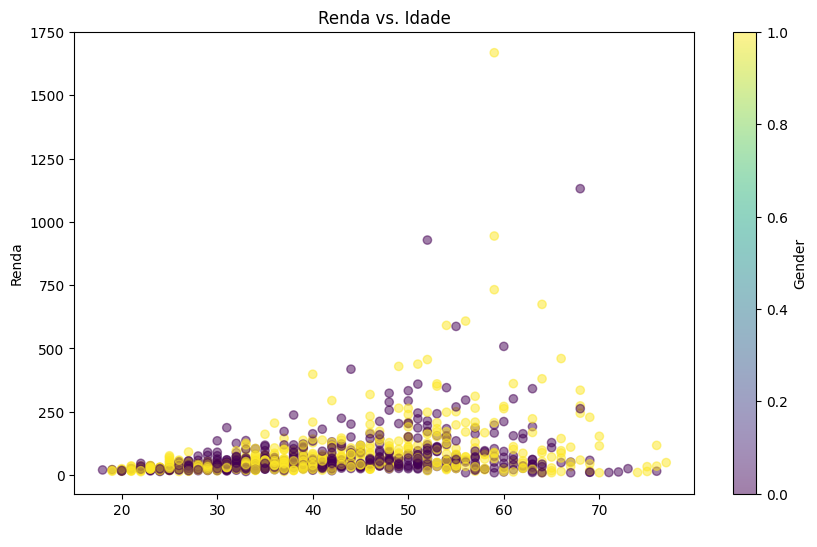

In [27]:
# Distribuição Renda vs. Idade considerando o gênero
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['income'], c=df['gender'], alpha=0.5)
plt.title('Renda vs. Idade')
plt.xlabel('Idade')
plt.ylabel('Renda')
_ = plt.colorbar(label='Gender')

**Análise Explicativa do Gráfico Renda vs. Idade com referência ao Gênero**

O gráfico de dispersão mostra a relação entre idade e renda dos clientes, com a cor dos pontos representando o gênero (onde 0 e 1 indicam diferentes categorias de gênero).

A maioria dos clientes está concentrada em rendas abaixo de 250, independentemente da idade, há uma leve tendência de aumento da renda com o avanço da idade. Observa-se uma mistura da variável gênero em todas as faixas etárias e níveis de renda, ou seja, a variável de gênero parece não ter  influência sobre a distribuição de renda e idade.

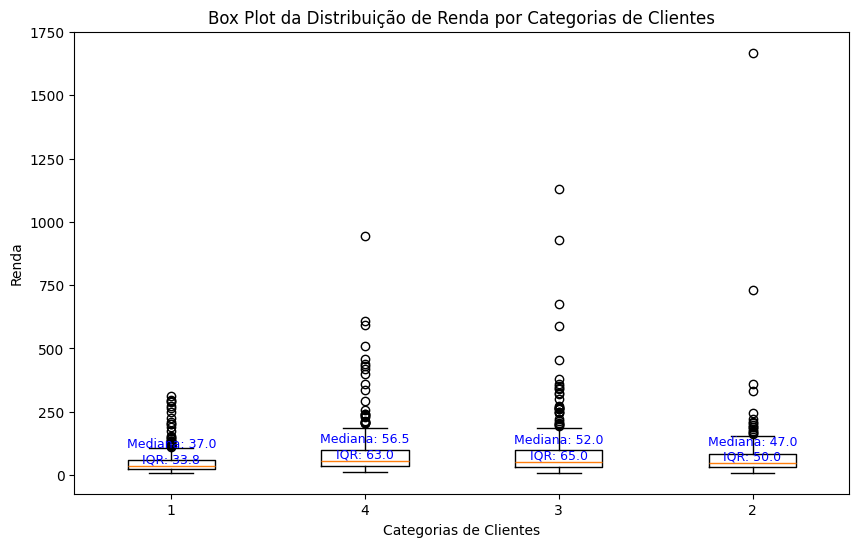

In [29]:
# Calcular Mediana e IQR para cada categoria
categorias = df['custcat'].unique()
medianas = [df['income'][df['custcat'] == i].median() for i in categorias]
iqr_values = [df['income'][df['custcat'] == i].quantile(0.75) - df['income'][df['custcat'] == i].quantile(0.25) for i in categorias]

# Criar o box plot
plt.figure(figsize=(10, 6))
plt.boxplot([df['income'][df['custcat'] == i] for i in categorias], labels=categorias)
plt.xlabel('Categorias de Clientes')
plt.ylabel('Renda')
plt.title('Box Plot da Distribuição de Renda por Categorias de Clientes')

# Imprimir no Box plot Mediana e Intervalo Interquartil (IQR)
for i, (mediana, iqr) in enumerate(zip(medianas, iqr_values), start=1):
    plt.text(i, mediana, f'Mediana: {mediana:.1f}\nIQR: {iqr:.1f}',
             ha='center', va='bottom', fontsize=9, color='blue')
plt.show()

**Análise Explicativa do Gráfico Box Plot da Distribuição de Renda por Categorias de Clientes**

O gráfico de box plot apresenta a distribuição da renda dos clientes segmentada por quatro categorias/planos da operadora, em que é possível observar a dispersão, a mediana, o intervalo interquartil (IQR) e a presença de *outliers* em cada categoria.

As quatro categorias de clientes exibem uma distribuição de renda semelhante, com a maioria das rendas concentrada em valores baixos. Em cada box plot, a mediana está próxima da base da escala de renda (abaixo de 100), indicando que as rendas na maioria dos casos são baixas, independentemente da categoria.

O box plot revela que, apesar da segmentação em quatro categorias de clientes, não há diferenças significativas na distribuição de renda entre elas, indicando que o nível de renda não é necessariamente o fator decisivo para escolha dos planos (1) Serviço Básico, (2) E-Serviço, (3) Serviço Plus ou (4) Serviço Total. Ainda assim, observa-se que a mediana da categoria 4 (Serviço Total) é ligeiramente maior que as demais, indicando que clientes com renda um pouco maior tendem a optar por planos de telefonia mais completos.

Todas as categorias apresentam uma maioria de rendas baixas, com uma pequena proporção de outliers em faixas de renda muito mais altas. Uma conclusão parcial é a de que a segmentação em categorias não está fortemente relacionada à renda dos clientes, mas que existem outros fatores além da renda a influenciar na decisão de escolha do respectivo plano, tais como, faixa etária, hábitos de consumo de Internet e necessidades de comunicação.

Cada categoria apresenta um número significativo de valores atípicos (outliers), indicados por pontos fora do limite superior. Esses valores representam clientes com rendas muito acima da média do grupo.
Alguns outliers estão acima de 500, e há casos excepcionais que ultrapassam 1000 em cada categoria, sugerindo a presença de rendas significativamente elevadas em todas as categorias, embora eles representem uma pequena proporção dos dados.

## **Definição do Conjunto de Variáveis**

In [30]:
# Imprime os nomes das colunas do DataFrame 'df'
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [31]:
# Usa a biblioteca scikit-learn para converter o quadro de dados Pandas em um array Numpy
# Seleciona as colunas especificadas do DataFrame para conjuntos de recursos, X

X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
# Extrai os valores das colunas selecionadas como um array NumPy.
X[0:5] #Imprime as primeiras 5 linhas do array X

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [32]:
# Cria o array NumPy 'y' com os valores da coluna 'custcat', variável alvo (rótulo) no conjunto de dados.
y = df['custcat'].values
y[0:5] #Imprime os primeiros 5 valores do array 'y'

array([1, 4, 3, 1, 3])

In [33]:
# Padronizar as features usando StandardScaler
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

**Padronização dos Dados/Variáveis**

Em modelagens em Machine Learning a padronização dos dados é uma técnica importante para garantir que todas as features tenham a mesma escala. A padronização de dados fornece média zero e variância unitária aos dados, é uma boa prática, especialmente para algoritmos como k-NN, que se baseia na distância dos pontos de dados, permitindo-se melhorar o desempenho do algoritmo.

1.   `preprocessing.StandardScaler()`: Cria um objeto StandardScaler da biblioteca scikit-learn, que é usado para padronizar os dados, ou seja, transformar os dados para que tenham média zero e desvio padrão igual a 1.
2. `.fit(X)`: Ajusta o objeto StandardScaler aos dados do array X, serve para calcular a média e o desvio padrão de cada feature.
3. `.transform(X.astype(float))`: Transforma em `float` os dados do array X usando a média e o desvio padrão calculados na etapa anterior.

In [34]:
def split_data(X, y, test_size=0.2, random_state=4):
    """
    Divide um conjunto de dados em conjuntos de treinamento e teste.

    Args:
        X: DataFrame ou array NumPy contendo as features.
        y: Série Pandas ou array NumPy contendo os rótulos.
        test_size: Proporção dos dados a ser usada para teste (padrão: 0.2).
        random_state: Semente para o gerador de números aleatórios (padrão: 4).

    Returns:
        Uma tupla contendo quatro objetos: X_train, X_test, y_train, y_test.
    """
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

# Chamada da função para dividir os dados
X_train, X_test, y_train, y_test = split_data(X, y)

# Exibir as dimensões dos conjuntos de treino e teste
print('Formato do conjunto de treinamento:', X_train.shape, y_train.shape)
print('Formato do conjunto de teste:', X_test.shape, y_test.shape)



Formato do conjunto de treinamento: (800, 11) (800,)
Formato do conjunto de teste: (200, 11) (200,)


Nesta etapa os dados foram divididos em subconjuntos aleatórios de treino (80%) e teste (20%), a divisão permite que o modelo seja treinado num conjunto de dados e testado noutro, simulando-se como se comportaria com entrada de novos dados. A utilização do `random_state` garante que a divisão seja consistente em diferentes execuções do código.

## **Classificação usando o K-Nearest Neighbor (K-NN)**

O K-Nearest Neighbor (K-NN) classifica os pontos de dados com base na classe dos seus "`k`" vizinhos mais próximos, o parâmetro define quantos vizinhos são considerados na classificação.

### **Funcionamento do 𝐾-NN**

O KNN segue os seguintes passos:

1. Escolher um valor para 𝐾, que representa o número de vizinhos mais próximos a considerar.
2. Calcular a distância entre o novo ponto (não rotulado) e todos os pontos no conjunto de dados.
3. Identificar os 𝐾 vizinhos mais próximos.
4. Classificar o novo ponto com base na votação majoritária dos rótulos desses
𝐾 vizinhos.

### **Importância de Escolher o Valor de 𝐾**

* **𝐾 muito baixo** (e.g., 𝐾=1): O modelo se torna sensível a *outliers* e ruídos nos dados. Por exemplo, ao usar apenas o vizinho mais próximo, um ponto atípico pode levar a uma classificação incorreta.
* **𝐾 muito alto** (e.g., 𝐾=20): O modelo se torna excessivamente generalizado, perdendo detalhes importantes e podendo agrupar erroneamente dados de diferentes classes.

A escolha ideal de 𝐾 é feita utilizando um conjunto de validação, onde diferentes valores de 𝐾 são testados para identificar aquele que maximiza a precisão do modelo.

### **Observações importantes**

* **Normalização dos Dados**: para evitar que características com escalas diferentes (e.g., idade e renda) dominem o cálculo da distância, é essencial normalizar os dados antes de aplicar o KNN.
* **Métricas de Distância**: A distância Euclidiana é comumente usada, mas outras métricas correlatas, como [Manhattan ou Minkowski](https://github.com/SampMark/Computational-Thinking/blob/main/Minkowski_Manhattan_and_Euclidean_distance_metrics.ipynb), podem ser aplicadas dependendo da natureza dos dados.
* **Domínio do Problema**: A escolha das características e da métrica de distância deve levar em conta o domínio do problema, garantindo que os dados sejam representativos e relevantes.

In [35]:
# Importa a classe KNeighborsClassifier do módulo neighbors da biblioteca sklearn para implementar o algoritmo KNN
from sklearn.neighbors import KNeighborsClassifier

In [36]:
k = 4 # Define o número de vizinhos mais próximos (k)
# Treina modelo para k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [37]:
# Usa o modelo treinado (neigh) para prever os rótulos (yhat) para o conjunto de teste (X_test)
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4])

Nesta etapa, utiliza-se o algoritmo KNN para classificação e, avalia-se sua acurácia (nível de exatidão dos resultados obtidos), supondo-se diferentes valores de `k`. Para tal, foi criado o objeto `KNeighborsClassifier` para definição do número de vizinhos `(n_neighbors = k)`. O método `fit()` ajusta o modelo K-NN aos dados de treinamento (`X_train` para as features e `y_train` para os rótulos). Para o cálculo da acurácia do modelo tanto para conjunto de treinamento como de teste, utilizando-se a função `accuracy_score()`, conforme se segue.

In [38]:
# Importa o módulo metrics da biblioteca sklearn para calcular a acurácia
from sklearn import metrics
# Imprime os valores de acurácia para os conjuntos de treinamento e teste
yhat = neigh.predict(X_test)
yhat[0:5]
print("Acurácia do conjunto de treino: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Acurácia do conjunto de teste: ", metrics.accuracy_score(y_test, yhat))

Acurácia do conjunto de treino:  0.5475
Acurácia do conjunto de teste:  0.32


In [39]:
#Treinar modelo para k = 6, nova previsão
k = 6
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh
yhat = neigh.predict(X_test)
yhat[0:5]
print("Acurácia do conjunto de treino: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Acurácia do conjunto de teste: ", metrics.accuracy_score(y_test, yhat))

Acurácia do conjunto de treino:  0.51625
Acurácia do conjunto de teste:  0.31


### **Análise da Acurácia**

 A análise da acurácia para diferentes valores de k é crucial para otimizar o modelo e garantir que ele generalize bem para novos dados. Para encontrar o melhor valor de k, é necessário testar diferentes valores e comparar as acurácias no conjunto de teste. Técnicas como validação cruzada podem ajudar a escolher o valor "ideal" de k. Vamos analisar os resultados obtidos:

*   Para `k=4`, a acurácia no conjunto de treinamento é 0.5475 (54.75%) e no
conjunto de teste é 0.32 (32%).

* Para `k=6`, a acurácia no conjunto de treinamento é 0.51625 (51.625%) e no conjunto de teste é 0.31 (31%).

Como se observa, a acurácia no conjunto de teste é significativamente menor do que no conjunto de treinamento para ambos os valores de `k` escolhidos. Isto significa que o modelo pode estar se ajustando "muito bem" aos dados de treinamento (todavia, isto não é legal, o modelo está sofrendo *overfitting*), o que implica que não generalizará bem para novos dados.

Como as configurações de `k` utilizadas obteve-se baixa acurácia no conjunto de teste, portanto, o modelo KNN não se mostra  eficaz para classificar esses dados. É possível que outros algoritmos de classificação ou um pré-processamento diferente dos dados produzam melhores resultados.

### **Como encontrar o valor ideal de k que maximize a performance do modelo K-Nearest Neighbors (KNN)?**

Para tornar dinâmico o processo de descoberta do parâmetro `k` em que se  obtém melhor acurácia. O código a seguir cria um loop que testará diferentes valores para o parâmetro `k` (neste caso, no intervalo de 1 a 9). Assim, avalia-se rapidamente a acurácia do modelo para cada valor obtido.

In [40]:
# Teste de um loop para diferentes valores do parâmetro k (1 a 9) de modo a avaliar a acurácia do modelo para cada valor de k
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

# Loop para testar diferentes valores de k
for n in range(1,Ks):

    #Treinar Modelo e Prever
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

O loop ao itera sobre os valores de `n` de 1 a 9 (usando `range(1,Ks)`). Para cada valor, o código acima  treina e testa o modelo KNN e calcula a acurácia média. O resultado final é um array contendo a acurácia para cada k.

Observando o array `mean_acc`, identifica-se qual valor de `k` resultou em maior acurácia no conjunto de teste. No resultado, o array `mean_acc` calculado encontrou o melhor valor (0.34), que corresponde à maior acurácia para `k = 9`.

O gráfico a seguir nos permite visualizar e nos ajuda a entender como a performance do modelo KNN varia conforme a escolha do parâmetro k

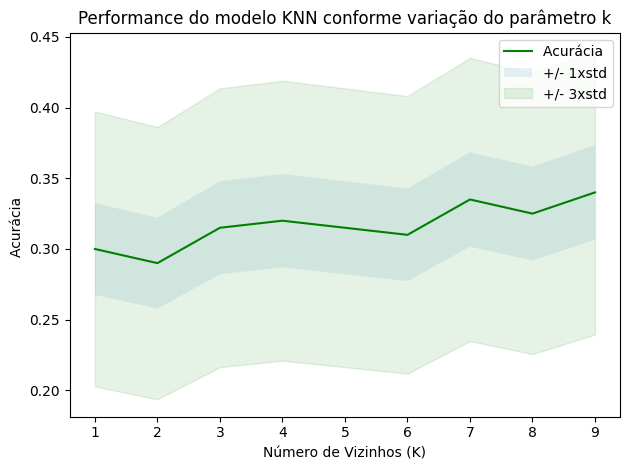

In [41]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Acurácia ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Acurácia ')
plt.xlabel('Número de Vizinhos (K)')
plt.title('Performance do modelo KNN conforme variação do parâmetro k')
plt.tight_layout()
plt.show()

In [23]:
print( "A melhor acurácia foi", mean_acc.max(), "para k =", mean_acc.argmax()+1)

A melhor acurácia foi 0.34 para k = 9
